In [251]:
from copy import deepcopy
from random import shuffle

import numpy as np
from scipy.stats import entropy

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.util import Distribution

from infomercial.discrete.value import entropy
from infomercial.discrete.value import surprisal
from infomercial.discrete.value import mutual_information
from infomercial.discrete.value import janson_shannon
from infomercial.discrete.value import kl_divergence
from infomercial.discrete.value import estimate_prob
from infomercial.discrete.value import delta_p
from infomercial.discrete.value import delta_H

from infomercial.local_gym import BanditFourArmedDeterministicFixed

In [252]:
# Sampling fns
def generate_obs(n0, n1, n2, n3):
    X = []
    X.extend([0] * n0)
    X.extend([1] * n1)
    X.extend([2] * n2)
    X.extend([3] * n3)
    shuffle(X)
    
    return X

# High to low entropy

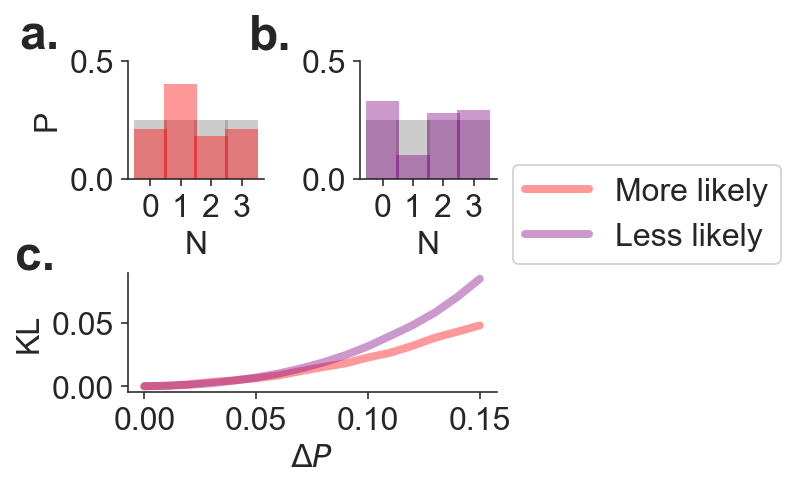

In [432]:
# Shared
i = 1
N = 15

# ---------------------------------------------
# Increasing
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find an not i
    shuffle(r)
    n = r[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # Save
    Y.append(deepcopy(y))

# -
Y_i = deepcopy(Y)
MI_i = [mutual_information(X, y) for y in Y]
KL_i = [kl_divergence(X, y) for y in Y]
dH_i = [entropy(y) - entropy(X) for y in Y]

# ---------------------------------------------
# Decreasing
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find i
    loc = y.index(i)
    
    # Pick a not i to replace it
    shuffle(r)
    n = r[0]
    
    # Change to i to not i
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))

# -
Y_d = deepcopy(Y)
MI_d = [mutual_information(X, y) for y in Y]
KL_d = [kl_divergence(X, y) for y in Y]
dH_d = [entropy(y) - entropy(X) for y in Y]

# ---------------------------------------------
fig = plt.figure(figsize=(4, 5))
grid = plt.GridSpec(3, 6, wspace=0.3, hspace=0.8)

# Inc/Dec
# Dists
plt.subplot(grid[1:2, 0:2])
plt.bar([0, 1, 2, 3], estimate_prob(Y_i[0])[0], width=1.1, linewidth=0, color="grey", alpha=0.4)
plt.bar([0, 1, 2, 3], estimate_prob(Y_i[-1])[0], width=1.1, linewidth=0, color="red", alpha=0.4)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2, 3])
plt.ylabel("P")
plt.xlabel("N")
plt.text(-3, 0.7, "a.", fontsize=24, fontweight='bold', va='top', ha='right')

plt.subplot(grid[1:2, 3:5])
plt.bar([0, 1, 2, 3], estimate_prob(Y_d[0])[0], width=1.1, linewidth=0, color="grey", alpha=0.4)
plt.bar([0, 1, 2, 3], estimate_prob(Y_d[-1])[0], width=1.1, linewidth=0, color="purple", alpha=0.4)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2, 3])
plt.xlabel("N")
plt.text(-3, 0.7, "b.", fontsize=24, fontweight='bold', va='top', ha='right')

# Metrics
ps = np.asarray(range(N+1)) / 100
plt.subplot(grid[2, :5])
plt.plot(ps, KL_i, color="red", alpha=0.4, linewidth=4, label="More likely")
plt.plot(ps, KL_d, color="purple",  alpha=0.4, linewidth=4, label="Less likely")
plt.ylabel("KL")
plt.xlabel("$\Delta P$")
plt.text(-.04, 0.12, "c.", fontsize=24, fontweight='bold', va='top', ha='right')
plt.xticks([0.0, 0.05, 0.1, 0.15])
plt.legend(loc='center left', bbox_to_anchor=(1, 1.5))

# plt.subplot(grid[3, :5])
# plt.plot(ps, np.abs(dH_i), color="red", alpha=0.4, linewidth=4)
# plt.plot(ps, np.abs(dH_d), color="purple",  alpha=0.4, linewidth=4)
# plt.ylabel("|dH|")
# plt.xticks([0.0, 0.05, 0.1, 0.15])

# plt.subplot(grid[4, :5])
# plt.plot(ps, MI_i, color="red", alpha=0.4, linewidth=4, label="More likely")
# plt.plot(ps, MI_d, color="purple",  alpha=0.4, linewidth=4, label="Less likely")
# plt.ylabel("MI")
# plt.xticks([0.0, 0.05, 0.1, 0.15])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# _ = fig.tight_layout()
_ = sns.despine()

plt.savefig("figures/metrics_likelihood.pdf",  bbox_inches='tight')
plt.savefig("figures/metrics_likelihood.png",  bbox_inches='tight')
plt.savefig("figures/metrics_likelihood.eps",  bbox_inches='tight')

# Specificity

/Users/qualia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


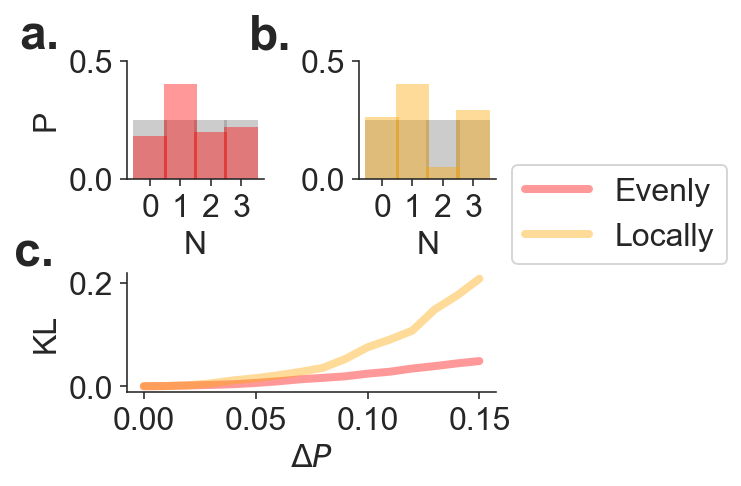

In [435]:
# Shared
i = 1
N = 15

# ---------------------------------------------
# Global
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find an not i
    shuffle(r)
    n = r[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # Save
    Y.append(deepcopy(y))

# -
Y_g = deepcopy(Y)
MI_g = [mutual_information(X, y) for y in Y]
KL_g = [kl_divergence(X, y) for y in Y]
dH_g = [entropy(y) - entropy(X) for y in Y]

# ---------------------------------------------
# Local
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r1 = [0, 2, 3]
r2 = [0, 3]
for _ in range(N):
    # -------------------------
    # Find a not i
    shuffle(r1)
    n = r1[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # -------------------------
    # Find i + 1
    loc = y.index(i + 1)
    
    # Replace w/ a not i/i+1
    shuffle(r2)
    n = r2[0]
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))
    
Y_l = deepcopy(Y)

# -
Y_l = deepcopy(Y)
MI_l = [mutual_information(X, y) for y in Y]
KL_l = [kl_divergence(X, y) for y in Y]
dH_l = [entropy(y) - entropy(X) for y in Y]

# ---------------------------------------
fig = plt.figure(figsize=(4, 5))
grid = plt.GridSpec(3, 6, wspace=0.3, hspace=0.8)

# Dists
plt.subplot(grid[1:2, 0:2])
plt.bar([0, 1, 2, 3], estimate_prob(Y_g[0])[0], width=1.1, linewidth=0, color="grey", alpha=0.4)
plt.bar([0, 1, 2, 3], estimate_prob(Y_g[-1])[0], width=1.1, linewidth=0, color="red", alpha=0.4)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2, 3])
plt.text(-3, 0.7, "a.", fontsize=24, fontweight='bold', va='top', ha='right')
plt.ylabel("P")
plt.xlabel("N")

plt.subplot(grid[1:2, 3:5])
plt.bar([0, 1, 2, 3], estimate_prob(Y_l[0])[0], width=1.1, linewidth=0, color="grey", alpha=0.4)
plt.bar([0, 1, 2, 3], estimate_prob(Y_l[-1])[0], width=1.1, linewidth=0, color="orange", alpha=0.4)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2, 3])
plt.text(-3, 0.7, "b.", fontsize=24, fontweight='bold', va='top', ha='right')
plt.xlabel("N")

# Metrics
plt.subplot(grid[2, :5])
plt.plot(ps, KL_g, color="red", alpha=0.4, linewidth=4, label="Evenly")
plt.plot(ps, KL_l, color="orange",  alpha=0.4, linewidth=4, label="Locally")
plt.xticks([0.0, 0.05, 0.1, 0.15])
plt.ylabel("KL")
plt.xlabel("$\Delta P$")
plt.legend(loc='center left', bbox_to_anchor=(1, 1.5))
plt.text(-.04, 0.3, "c.", fontsize=24, fontweight='bold', va='top', ha='right')

# plt.subplot(grid[6, :5])
# plt.plot(ps, np.abs(dH_g), color="red", alpha=0.4, linewidth=4, label="General")
# plt.plot(ps, np.abs(dH_l), color="orange",  alpha=0.4, linewidth=4, label="Specific")
# plt.ylabel("|dH|")
# plt.xticks([0.0, 0.05, 0.1, 0.15])

# plt.subplot(grid[7, :5])
# plt.plot(ps, MI_g, color="red", alpha=0.4, linewidth=4, label="General")
# plt.plot(ps, MI_l, color="orange",  alpha=0.4, linewidth=4, label="Specific")
# plt.ylabel("MI")
# plt.xticks([0.0, 0.05, 0.1, 0.15])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# 
_ = fig.tight_layout()
_ = sns.despine()

plt.savefig("figures/metrics_specifity.pdf",  bbox_inches='tight')
plt.savefig("figures/metrics_specifity.png",  bbox_inches='tight')
plt.savefig("figures/metrics_specifity.eps",  bbox_inches='tight')

/Users/qualia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


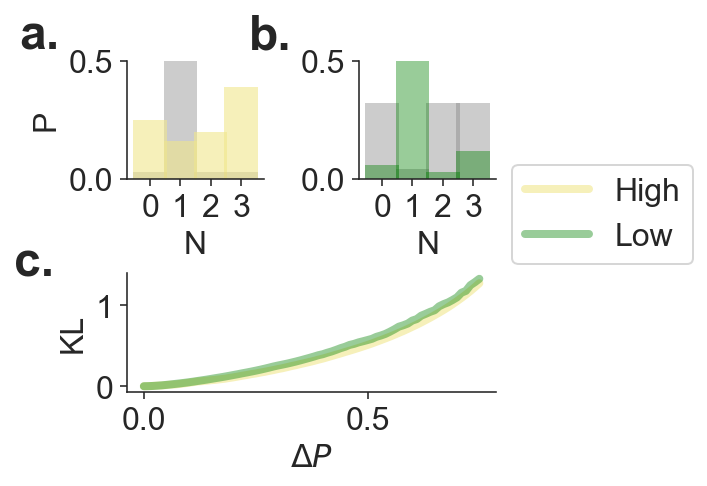

In [463]:
# Delta P

N = 75

# ---------------------------------------
# Positive
X = generate_obs(3, 91, 3, 3)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find i
    loc = y.index(i)
    
    # Pick a not i to replace it
    shuffle(r)
    n = r[0]
    
    # Change to i to not i
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))

# -
Y_p = deepcopy(Y)
dH_p = [entropy(y) - entropy(X) for y in Y]
MI_p = [mutual_information(X, y) for y in Y]
KL_p = [kl_divergence(X, y) for y in Y]

# ---------------------------------------
# Negetive
X = generate_obs(32, 4, 32, 32)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find not i
    while True:
        shuffle(r)
        n = r[0]
        if n in y:
            loc = y.index(n)
            break
    
    # Replace w/ i
    y[loc] = i

    # Save
    Y.append(deepcopy(y))
        
# -
Y_n = deepcopy(Y)
dH_n = [entropy(y) - entropy(X) for y in Y]
MI_n = [mutual_information(X, y) for y in Y]
KL_n = [kl_divergence(X, y) for y in Y]

# ---------------------------------------
fig = plt.figure(figsize=(4, 5))
grid = plt.GridSpec(3, 6, wspace=0.3, hspace=0.8)

# Dists
plt.subplot(grid[1:2, 0:2])
plt.bar([0, 1, 2, 3], estimate_prob(Y_p[0])[0], width=1.1, linewidth=0, color="grey", alpha=0.4)
plt.bar([0, 1, 2, 3], estimate_prob(Y_p[-1])[0], width=1.1, linewidth=0, color="khaki", alpha=0.6)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2, 3])
plt.text(-3, 0.7, "a.", fontsize=24, fontweight='bold', va='top', ha='right')
plt.ylabel("P")
plt.xlabel("N")

plt.subplot(grid[1:2, 3:5])
plt.bar([0, 1, 2, 3], estimate_prob(Y_n[0])[0], width=1.1, linewidth=0, color="grey", alpha=0.4)
plt.bar([0, 1, 2, 3], estimate_prob(Y_n[-1])[0], width=1.1, linewidth=0, color="green", alpha=0.4)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2, 3])
plt.text(-3, 0.7, "b.", fontsize=24, fontweight='bold', va='top', ha='right')
plt.xlabel("N")

# Metrics
ps = np.asarray(range(N+1)) / 100
plt.subplot(grid[2, :5])
plt.plot(ps, KL_p, color="khaki", alpha=0.6, linewidth=4, label="High")
plt.plot(ps, KL_n, color="green",  alpha=0.4, linewidth=4, label="Low")
plt.ylabel("KL")
plt.xlabel("$\Delta P$")
plt.legend(loc='center left', bbox_to_anchor=(1, 1.5))
plt.text(-.2, 1.8, "c.", fontsize=24, fontweight='bold', va='top', ha='right')

# plt.subplot(grid[2, :5])
# plt.plot(ps, np.abs(dH_p), color="khaki", alpha=0.6, linewidth=4)
# plt.plot(ps, np.abs(dH_n), color="green",  alpha=0.4, linewidth=4)
# plt.ylabel("|dH|")
# plt.xticks([0.0, 0.25, 0.5, 0.75])

# plt.subplot(grid[3, :5])
# plt.plot(ps, MI_p, color="khaki", alpha=0.6, linewidth=4, label="High")
# plt.plot(ps, MI_n, color="green",  alpha=0.4, linewidth=4, label="Low")
# plt.ylabel("MI")
# plt.xticks([0.0, 0.25, 0.5, 0.75])
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

_ = fig.tight_layout()
_ = sns.despine()

plt.savefig("figures/metrics_updown.pdf",  bbox_inches='tight')
plt.savefig("figures/metrics_updown.png",  bbox_inches='tight')
plt.savefig("figures/metrics_updown.eps",  bbox_inches='tight')